In [9]:
# Анализ производственных отклонений
# Этот файл содержит python-код для анализа журналов бурения с целью выявления отклонений и корреляций.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# 1. Загрузка данных
drilling_logs_df = pd.read_csv("drilling_logs.csv", parse_dates=["log_date", "shift_start_time", "shift_end_time"])

print(f"Всего записей в журналах бурения: {len(drilling_logs_df)}")

Всего записей в журналах бурения: 11394


In [12]:
# 2. Расчёт продолжительности смен и объёмов бурения
drilling_logs_df["shift_duration_hours"] = (drilling_logs_df["shift_end_time"] - drilling_logs_df["shift_start_time"]).dt.total_seconds() / 3600

# Рассчитываем суточную проходку на бригаду
daily_drilled_depth = (
        drilling_logs_df
        .groupby(["log_date", "brigade_id"])["drilled_depth_m"]
        .sum()
        .reset_index()
)

daily_drilled_depth.rename(columns={"drilled_depth_m": "daily_drilled_depth_m"}, inplace=True)

print("Рассчитаные продолжительности смен и суточные проходки:")
print(daily_drilled_depth.head())

Рассчитаные продолжительности смен и суточные проходки:
    log_date  brigade_id  daily_drilled_depth_m
0 2023-01-01  BRIGADE_01                  68.26
1 2023-01-01  BRIGADE_02                 122.95
2 2023-01-01  BRIGADE_03                  27.15
3 2023-01-01  BRIGADE_04                 182.45
4 2023-01-01  BRIGADE_05                  89.01


In [13]:
# 3. Анализ скоростей бурения и корреляций
# Рассчитываем скорость бурения (метров в час)
drilling_logs_df["drilling_rate_m_per_hour"] = drilling_logs_df["drilled_depth_m"] / drilling_logs_df["shift_duration_hours"]

# Корреляция с погодными условиями
weather_drilling_rate = (
        drilling_logs_df
        .groupby("weather")["drilling_rate_m_per_hour"]
        .mean()
        .reset_index()
)

print("\nСредняя скорость бурения по погодным условиям:")
print(weather_drilling_rate)


Средняя скорость бурения по погодным условиям:
  weather  drilling_rate_m_per_hour
0  Cloudy                  6.384712
1   Rainy                  6.246816
2   Snowy                  6.436902
3   Sunny                  6.407156
4   Windy                  6.382393


In [14]:
# Корреляция с проблемами логистики
logistics_drilling_rate = drilling_logs_df.groupby("logistics_issue")["drilling_rate_m_per_hour"].mean().reset_index()

print("\nСредняя скорость бурения при наличии/отсутствии логистических проблем:")
print(logistics_drilling_rate)


Средняя скорость бурения при наличии/отсутствии логистических проблем:
   logistics_issue  drilling_rate_m_per_hour
0            False                  6.381426
1             True                  6.275674



Средняя суточная проходка по бригадам:
   brigade_id  daily_drilled_depth_m
1  BRIGADE_02             116.093759
8  BRIGADE_09             111.868147
9  BRIGADE_10             110.402920
2  BRIGADE_03             109.738636
7  BRIGADE_08             109.579476
6  BRIGADE_07             108.927692
5  BRIGADE_06             108.563322
3  BRIGADE_04             108.288059
4  BRIGADE_05             107.176626
0  BRIGADE_01             106.517797



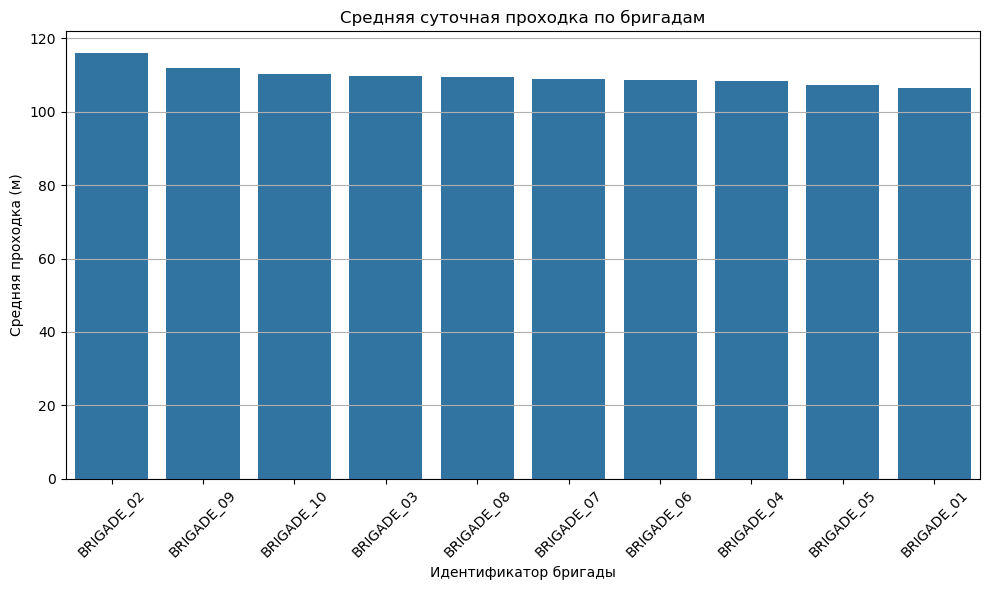

In [15]:
# --- 4. Когортный анализ по бригадам (упрощённый) ---
# Анализируем среднюю суточную проходку на бригаду в динамике
brigade_performance = (
        daily_drilled_depth
        .groupby("brigade_id")["daily_drilled_depth_m"]
        .mean()
        .reset_index()
)

brigade_performance = brigade_performance.sort_values(by="daily_drilled_depth_m", ascending=False)

print("\nСредняя суточная проходка по бригадам:")
print(brigade_performance)
print()

# График производительности бригад
plt.figure(figsize=(10, 6))
sns.barplot(x="brigade_id", y="daily_drilled_depth_m", data=brigade_performance)

plt.title("Средняя суточная проходка по бригадам")
plt.xlabel("Идентификатор бригады")
plt.ylabel("Средняя проходка (м)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

Ключевые выводы:
- Скорость бурения значительно варьируется в зависимости от погодных условий и наличия логистических проблем.
- Некоторые бригады стабильно превосходят другие по показателю суточной проходки.

Рекомендации:
- Исследовать конкретные логистические проблемы и внедрить решения для минимизации их влияния.
- Проанализировать лучшие практики высокопроизводительных бригад и распространить их по организации.
- Внедрить прогнозные модели для предсказания отклонений бурения на основе метеорологических и логистических прогнозов.
Проект 3: Анализ Производственных Отклонений Буровых Операций - Анализ завершён.